# 군집 평가: Silhouette Score

- 실루엣 계수를 통해 군집화의 품질 평가
- 실루엣 계수는 -1에서 1 사이의 값을 가짐
    - 1에 가까울수록 군집도가 좋음 (다른 군집과 잘 분리되어 있음)
    - 0은 군집의 경계에 위치함
    - -1은 다른 군집과 겹치거나 잘못 분류된 경우

**주요 속성**
- silhouette_samples: 개별 데이터 포인트의 점수
- silhouette_score: 전체 데이터포인트의 평균값

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['Species'] = iris.target

In [4]:
# KMeans 군집화
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=100, random_state=0)
kmeans.fit(iris.data) # 입력 데이터를 통해 중심점 계산

iris_df['cluster'] = kmeans.labels_

In [7]:
# 실루엣 계수 측정
from sklearn.metrics import silhouette_samples, silhouette_score

sil_samples = silhouette_samples(iris.data, kmeans.labels_)
# sil_samples.shape
iris_df['sil_score'] = sil_samples

In [9]:
sil_score = silhouette_score(iris.data, kmeans.labels_)
sil_score, iris_df['sil_score'].mean()

(np.float64(0.551191604619592), np.float64(0.551191604619592))

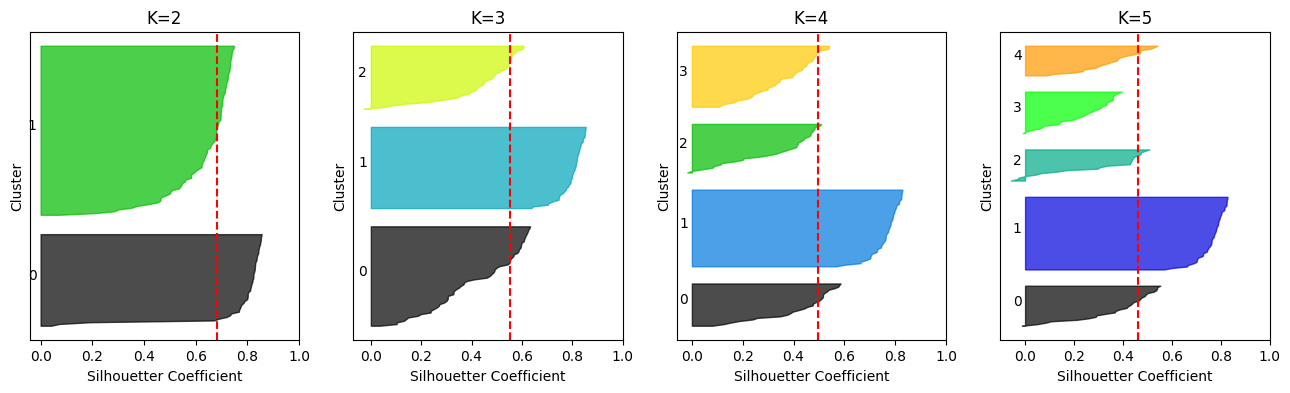

In [ ]:
# k값(클러스터 개수)별 실루엣 계수 시각화
def visualize_silhouette(n_clusters, X):
    """
    :param n_clusters: [2, 3, 4, 5] 테스트할 k값 목록 
    :param X: 입력데이터
    :return: 
    """
    import matplotlib.cm as cm
    
    # k개수
    n_cols = len(n_clusters)
    # subplot 생성
    fig, axs = plt.subplots(1, n_cols, figsize=(4 * n_cols, 4))
    
    for index, k in enumerate(n_clusters):
        # 군집 
        kmeans = KMeans(n_clusters=k, random_state=0)
        labels = kmeans.fit_predict(X) # 중심점 계산 및 클러스터 결과 반환
        # 실루엣 계수
        sil_samples = silhouette_samples(X, labels)
        sil_score = silhouette_score(X, labels)
        
        # y축 범위
        y_lower = 10
        
        # plot 그리기
        for i in range(k): # range(2) = 0, 1  range(3) = 0, 1, 2
            ith_cluster_sil_samples = sil_samples[labels == i] # 이번 클러스터에 실루엣 계수 필터링
            ith_cluster_sil_samples.sort() # inplace 연산
            
            # 크기(영역) 계산
            ith_size = ith_cluster_sil_samples.shape[0]
            y_upper = y_lower + ith_size
            
            # 색상 지정
            color = cm.nipy_spectral(float(i) / k) # 클러스터 별 고유한 색상
            # print(color) # (r, g, b, a)
            axs[index].fill_betweenx(
                np.arange(y_lower, y_upper),    # y축 범위
                0,                              # x축1
                ith_cluster_sil_samples,        # x축2
                facecolor=color,                # 색상
                edgecolor=color,                # 테두리 색상
                alpha=0.7                       # 투명도
            )
            # 텍스트 추가
            axs[index].text(-0.05, y_lower + 0.5 * ith_size, str(i))

            y_lower = y_upper + 10 # 다음 차례의 아래경계 계산
        
        # 전체 실루엣 계수
        axs[index].axvline(x=sil_score, color='red', linestyle='--')
        
        # x, y축 라벨
        axs[index].set_xlabel('Silhouetter Coefficient')
        axs[index].set_ylabel('Cluster')
        
        # axis별 제목
        axs[index].set_title(f'K={k}')
        
        # x, y tick조정
        axs[index].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        axs[index].set_yticks([])

# k값에 따른 실루엣 계수의 분포
visualize_silhouette([2, 3, 4, 5], iris.data)    # [2, 3, 4, 5]: k값